In [58]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
iris = load_iris()

In [60]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [61]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [62]:
df = pd.DataFrame(iris.data)
df.columns = ['sepal length','sepal width','petal length','petal width']
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
df.drop(['sepal length','sepal width'],axis = 'columns',inplace = True)

In [64]:
df.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal width')

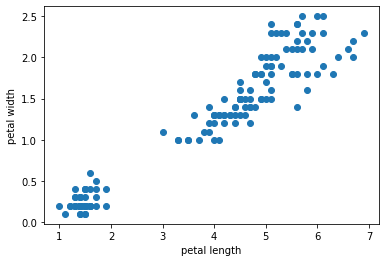

In [65]:
plt.scatter(df['petal length'],df['petal width'])
plt.xlabel('petal length')
plt.ylabel('petal width')

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(df[['petal length']])
df['petal length'] = scaler.transform(df[['petal length']])
scaler.fit(df[['petal width']])
df['petal width'] = scaler.transform(df[['petal width']])
df.head()

,petal length,petal width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [72]:
from sklearn.cluster import KMeans

In [81]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [82]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6795297632254395,
 0.5651273455703979,
 0.48580845539143697,
 0.4161854033639352]

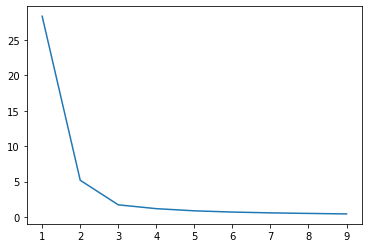

In [83]:
plt.plot(k_rng,sse)

In [87]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [88]:
df['cluster'] = y_predicted
df.head()

,petal length,petal width,cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


Text(0, 0.5, 'petal width')

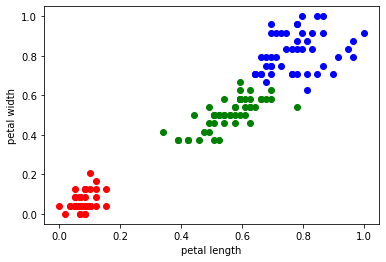

In [89]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
plt.scatter(df1['petal length'],df1['petal width'],color = 'red')
plt.scatter(df2['petal length'],df2['petal width'],color = 'blue')
plt.scatter(df3['petal length'],df3['petal width'],color = 'green')
plt.xlabel('petal length')
plt.ylabel('petal width')